# Rishabh Agrawal, Manisha Sharma, Ankitha Kumari

# SML PROJECT

# Libraries

In [69]:
import warnings
warnings.filterwarnings('ignore')
import docx
import xgboost
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from sklearn.utils import shuffle
import sklearn.linear_model as Lm
from sklearn.linear_model import LinearRegression as Lr
from math import sqrt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier,NearestNeighbors
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from sklearn.utils import shuffle
import sklearn.linear_model as Lm
from sklearn.linear_model import LinearRegression as Lr
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier

In [5]:
def getall(X_train, X_test, Y_train, Y_test, methods, names):
    pr1 = []
    rec1 = []
    f1s1 = []
    pr0 = []
    rec0 = []
    f1s0 = []
    accu = []
    accu1 = []
    mod = []
    roc = []
    ypre = {}
    cm = []
    for i in range(len(methods)):
        j = methods[i].fit(X_train, Y_train)
        jpred = j.predict(X_test)
        jpred1 = j.predict_proba(X_test)
        a = precision_recall_fscore_support(Y_test, jpred)
        pr0.append(a[0][0])
        rec0.append(a[1][0])
        f1s0.append(a[2][0])
        pr1.append(a[0][1])
        rec1.append(a[1][1])
        f1s1.append(a[2][1])
        mod.append(j)
        cm.append(confusion_matrix(Y_test, jpred))
        fpr, tpr, thresholds = (roc_curve(Y_test, jpred))
        accu.append(accuracy_score(Y_test, jpred))
        accu1.append(accuracy_score(Y_train, j.predict(X_train)))
        ypre[names[i]] = pd.DataFrame(jpred1)[1]
    z = pd.DataFrame(names, columns=['Names'])
    z['Precision-0'] = list(pr0)
    z['Precision-1'] = list(pr1)
    z['Recall-0'] = list(rec0)
    z['Recall-1'] = list(rec1)
    z['F1-Score-0'] = list(f1s0)
    z['F1-Score-1'] = list(f1s1)  
    z['Accuracy'] = list(accu)
    z['Accuracy On Train'] = list(accu1)
    z
    return z, ypre, cm, mod

In [6]:
methods = [LogisticRegression(random_state=0, solver = "lbfgs", max_iter = 10000),
          BernoulliNB(),
          LinearDiscriminantAnalysis(),
          svm.SVC(gamma='scale',probability=True),
          RandomForestClassifier(n_estimators=1000, max_depth=1000, random_state=0, criterion = "gini"),
          AdaBoostClassifier(),
          XGBClassifier()]
names = ["Logistic",
         "Bernoulli Naive-Bayes",
         "LDA",
         "SVM",
         "Random-Forest",
         "AdaBoost",
         "XGBoost"]
a = pd.read_csv("German_Final.csv")

# NORMAL DATA

In [7]:
c = a.copy(deep = True)
d = c["ClassificationStatus"]
c = c.drop(columns=['ClassificationStatus'])
c = c.drop(columns=['PersonalStatusAndSex'])
e = pd.get_dummies(c, drop_first=True)
e = e.drop(columns=[
                    "Marital_Status_Single",
"ForeignWorker_yes",
"CreditHistory_delay in paying off in the past ",
    "Property_None",
"CreditHistory_no credits taken/ all credits paid back duly ",
"Telephone_yes",
"ExistingCredits",
"Housing_Own",
"Purpose_Radio/TV",
"Purpose_Business",
"Property_Life Insurance",
"OtherGuarantors_None",
"CurrentEmplymentStatus_[1, 4) Years",
"SavingsAccount_[100, 500) DM",
"CurrentEmplymentStatus_Unemployed",
"CurrentEmplymentStatus_Above 7 Years",
"PeopleLiable",
"OtherInstallment_Stores",
"Job_Unskilled Resident",
"Purpose_Repairs",
"Purpose_Furniture",
"Purpose_Others",
"SavingsAccount_[500, 1000) DM",
"Job_Unemployed, Unskilled",
"Purpose_Retraining",
"Marital_Status_Married/Widowed"])
e = e.rename(columns={"CreditHistory_critical account/ other credits existing (not at this bank)": "CreditHistory_critical account",
                      "CreditHistory_existing credits paid back duly till now ": "CreditHistory_existing credits"})
X_train, X_test, y_train, y_test = train_test_split(e,d,test_size=0.30,random_state=0,stratify=d)
X_train1 = X_train.rename(columns={'SavingsAccount_[100, 500) DM': 'SavingsAccount_(100, 500) DM', 'SavingsAccount_[500, 1000) DM': 'SavingsAccount_(500, 1000) DM', 'CurrentEmplymentStatus_[1, 4) Years' : 'CurrentEmplymentStatus_(1, 4) Years', "CurrentEmplymentStatus_[4, 7) Years": "CurrentEmplymentStatus_(4, 7) Years"})
X_test1 = X_test.rename(columns={'SavingsAccount_[100, 500) DM': 'SavingsAccount_(100, 500) DM', 'SavingsAccount_[500, 1000) DM': 'SavingsAccount_(500, 1000) DM', 'CurrentEmplymentStatus_[1, 4) Years' : 'CurrentEmplymentStatus_(1, 4) Years', "CurrentEmplymentStatus_[4, 7) Years": "CurrentEmplymentStatus_(4, 7) Years"})
z, jpred, cm, mod = getall(X_train1, X_test1, y_train, y_test, methods, names)
z

,Names,Precision-0,Precision-1,Recall-0,Recall-1,F1-Score-0,F1-Score-1,Accuracy,Accuracy On Train
0,Logistic,0.694915,0.796680,0.455556,0.914286,0.550336,0.851441,0.776667,0.762857
1,Bernoulli Naive-Bayes,0.590909,0.820755,0.577778,0.828571,0.584270,0.824645,0.753333,0.740000
2,LDA,0.718750,0.813559,0.511111,0.914286,0.597403,0.860987,0.793333,0.764286
3,SVM,0.500000,0.711268,0.088889,0.961905,0.150943,0.817814,0.700000,0.732857
4,Random-Forest,0.773585,0.801619,0.455556,0.942857,0.573427,0.866521,0.796667,1.000000
5,AdaBoost,0.684932,0.823789,0.555556,0.890476,0.613497,0.855835,0.790000,0.784286
6,XGBoost,0.691176,0.814655,0.522222,0.900000,0.594937,0.855204,0.786667,0.878571


Logistic : Area Under Curve =  0.8561375661375661
Gaussian Naive-Bayes : Area Under Curve =  0.7727513227513227
LDA : Area Under Curve =  0.8517460317460318
SVM : Area Under Curve =  0.8547619047619047
Random-Forest : Area Under Curve =  0.8388888888888889
AdaBoost : Area Under Curve =  0.8355555555555556
XGBoost : Area Under Curve =  0.8386772486772486


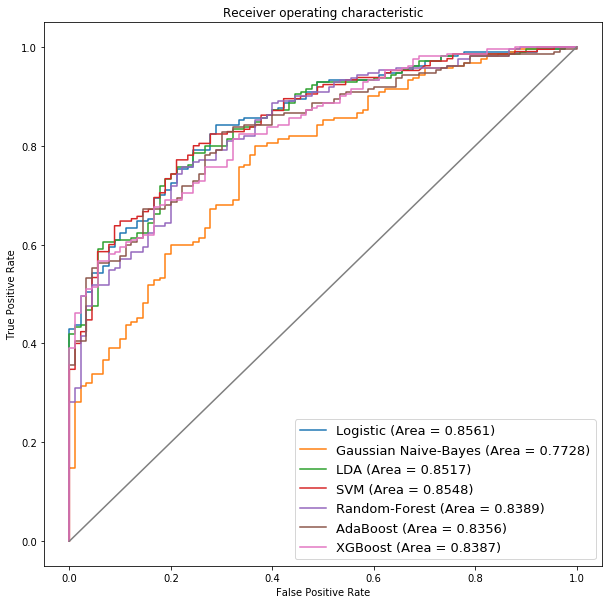

In [7]:
plt.figure(figsize=(10,10))
c = 0
for i,j in jpred.items():
    fpr, tpr, thresholds = roc_curve(np.array(y_test),j)
    ac = auc(fpr, tpr)
    print(names[c],": Area Under Curve = ", ac)
    slabel = names[c] + " (Area = %0.4f)" % ac
    plt.plot(fpr, tpr, label = slabel)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right", prop={'size': 13})
    c += 1
plt.plot([0,1],[0,1])

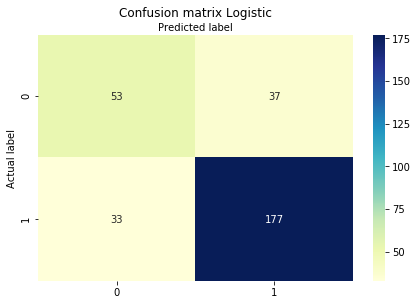

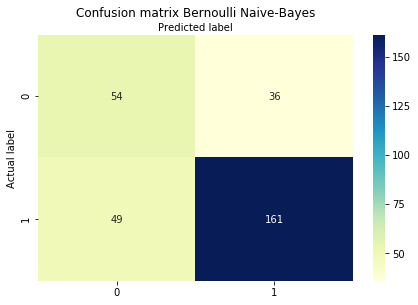

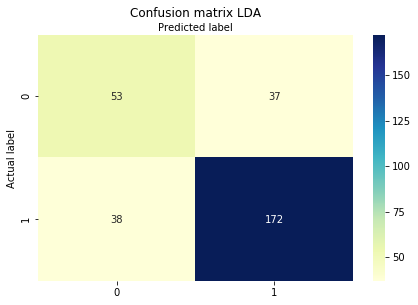

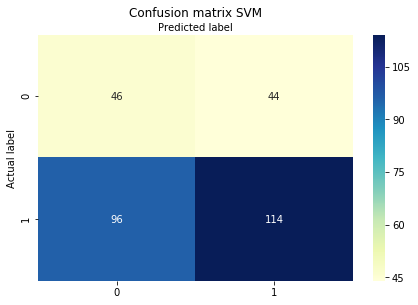

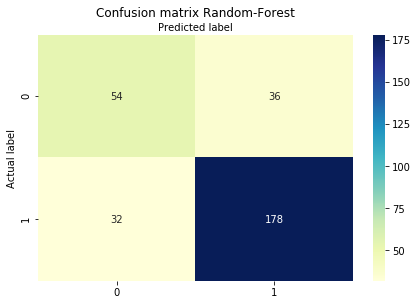

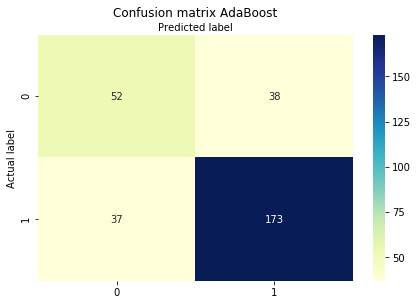

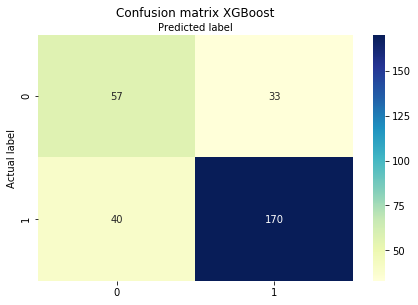

In [10]:
for i in range(len(names)):
    class_names = ['Defaulters', 'Non Defaulters']
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm[i]), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix ' + names[i], y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# SMOTE

In [70]:
sm = SMOTE(random_state=12, ratio = 1)
c = a.copy(deep = True)
d = c["ClassificationStatus"]
c = c.drop(columns=['ClassificationStatus'])
c = c.drop(columns=['PersonalStatusAndSex'])
e = pd.get_dummies(c, drop_first=True)
e = e.drop(columns=[

                    "Marital_Status_Single",
"ForeignWorker_yes",
"CreditHistory_delay in paying off in the past ",
    "Property_None",
"CreditHistory_no credits taken/ all credits paid back duly ",
"Telephone_yes",
"ExistingCredits",
"Housing_Own",
"Purpose_Radio/TV",
"Purpose_Business",
"Property_Life Insurance",
"OtherGuarantors_None",
"CurrentEmplymentStatus_[1, 4) Years",
"SavingsAccount_[100, 500) DM",
"CurrentEmplymentStatus_Unemployed",
"CurrentEmplymentStatus_Above 7 Years",
"PeopleLiable",
"OtherInstallment_Stores",
"Job_Unskilled Resident",
"Purpose_Repairs",
"Purpose_Furniture",
"Purpose_Others",
"SavingsAccount_[500, 1000) DM",
"Job_Unemployed, Unskilled",
"Purpose_Retraining",
"Marital_Status_Married/Widowed"])
X_train, X_test, y_train, y_test = train_test_split(e,d,test_size=0.30,random_state=0,stratify=d)
X_train,y_train = sm.fit_sample(X_train, y_train)
X_test = np.array(X_test)
z, jpred, cm, mod = getall(X_train, X_test, y_train, y_test, methods, names)
z

,Names,Precision-0,Precision-1,Recall-0,Recall-1,F1-Score-0,F1-Score-1,Accuracy,Accuracy On Train
0,Logistic,0.616279,0.827103,0.588889,0.842857,0.602273,0.834906,0.766667,0.807143
1,Bernoulli Naive-Bayes,0.524272,0.817259,0.600000,0.766667,0.559585,0.791155,0.716667,0.784694
2,LDA,0.582418,0.822967,0.588889,0.819048,0.585635,0.821002,0.750000,0.797959
3,SVM,0.323944,0.721519,0.511111,0.542857,0.396552,0.619565,0.533333,0.656122
4,Random-Forest,0.627907,0.831776,0.600000,0.847619,0.613636,0.839623,0.773333,1.000000
5,AdaBoost,0.584270,0.819905,0.577778,0.823810,0.581006,0.821853,0.750000,0.824490
6,XGBoost,0.587629,0.837438,0.633333,0.809524,0.609626,0.823245,0.756667,0.879592


Bernoulli Naive-Bayes : Area Under Curve =  0.7825925925925926


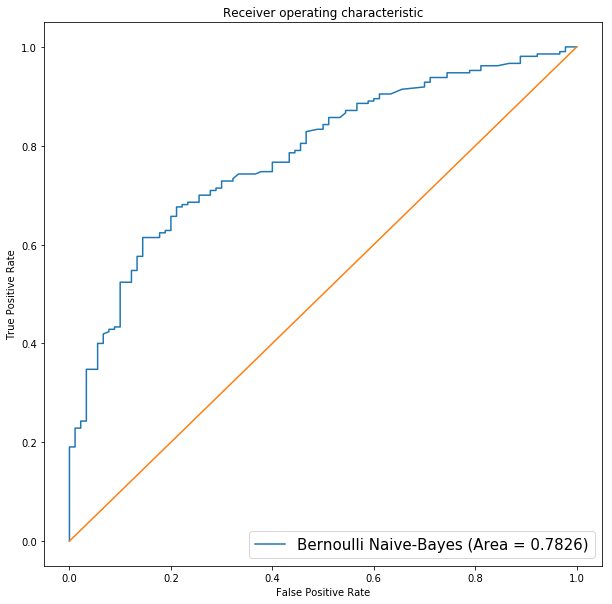

In [16]:
plt.figure(figsize=(10,10))
c = 1
for i,j in jpred.items():
    fpr, tpr, thresholds = roc_curve(np.array(y_test),jpred[names[c]])
    ac = auc(fpr, tpr)
    print(names[c],": Area Under Curve = ", ac)
    slabel = names[c] + " (Area = %0.4f)" % ac
    plt.plot(fpr, tpr, label = slabel)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right", prop={'size': 15})
    c += 1
    break
plt.plot([0,1],[0,1])

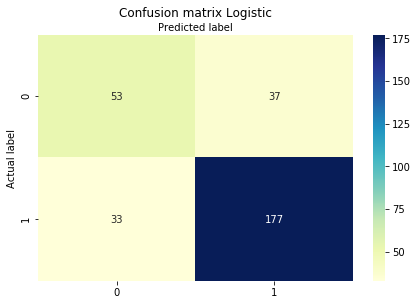

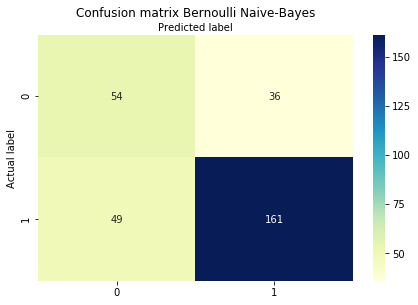

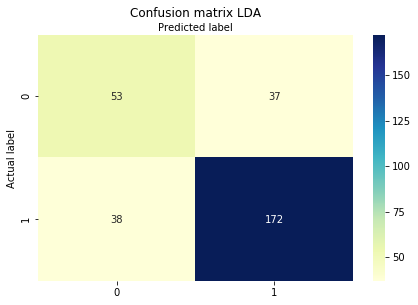

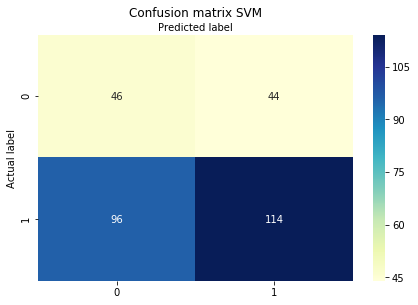

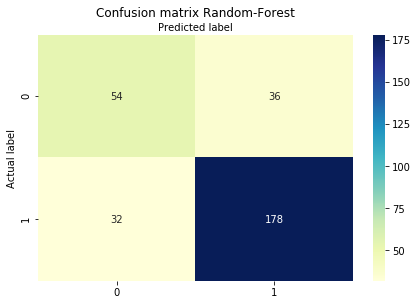

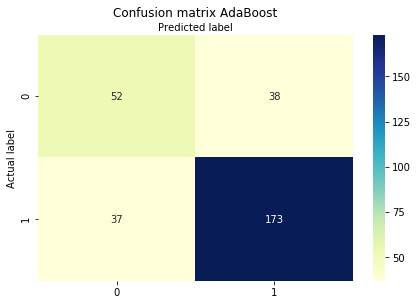

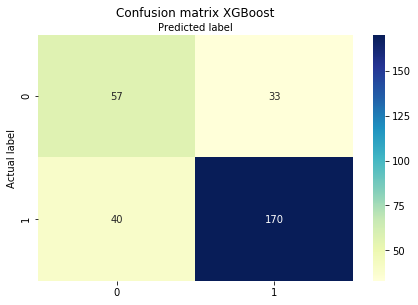

In [9]:
for i in range(len(names)):
    class_names = ['Defaulters', 'Non Defaulters']
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm[i]), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix ' + names[i], y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# UNDER-SAMPLING

In [10]:
rus = RandomUnderSampler(random_state=42)
c = a.copy(deep = True)
d = c["ClassificationStatus"]
c = c.drop(columns=['ClassificationStatus'])
c = c.drop(columns=['PersonalStatusAndSex'])
e = pd.get_dummies(c, drop_first=True)
e = e.drop(columns=[
                    "CreditAmount",
                    "Marital_Status_Single",
"ForeignWorker_yes",
"CreditHistory_delay in paying off in the past ",
    "Property_None",
"CreditHistory_no credits taken/ all credits paid back duly ",
"Telephone_yes",
"ExistingCredits",
"Housing_Own",
"Purpose_Radio/TV",
"Purpose_Business",
"Property_Life Insurance",
"OtherGuarantors_None",
"CurrentEmplymentStatus_[1, 4) Years",
"SavingsAccount_[100, 500) DM",
"CurrentEmplymentStatus_Unemployed",
"CurrentEmplymentStatus_Above 7 Years",
"PeopleLiable",
"OtherInstallment_Stores",
"Job_Unskilled Resident",
"Purpose_Repairs",
"Purpose_Furniture",
"Purpose_Others",
"SavingsAccount_[500, 1000) DM",
"Job_Unemployed, Unskilled",
"Purpose_Retraining",
"Marital_Status_Married/Widowed"])
X_train, X_test, y_train, y_test = train_test_split(e,d,test_size=0.30,random_state=0,stratify=d)
X_train, y_train = rus.fit_resample(X_train, y_train)
X_test = np.array(X_test)
z, jpred, cm, mod = getall(X_train, X_test, y_train, y_test, methods, names)
z

,Names,Precision-0,Precision-1,Recall-0,Recall-1,F1-Score-0,F1-Score-1,Accuracy,Accuracy On Train
0,Logistic,0.537313,0.891566,0.800000,0.704762,0.642857,0.787234,0.733333,0.700000
1,Gaussian Naive-Bayes,0.478873,0.860759,0.755556,0.647619,0.586207,0.739130,0.680000,0.700000
2,LDA,0.531915,0.905660,0.833333,0.685714,0.649351,0.780488,0.730000,0.700000
3,SVM,0.533333,0.890909,0.800000,0.700000,0.640000,0.784000,0.730000,0.716667
4,Random-Forest,0.507246,0.876543,0.777778,0.676190,0.614035,0.763441,0.706667,0.990476
5,AdaBoost,0.511278,0.868263,0.755556,0.690476,0.609865,0.769231,0.710000,0.714286
6,XGBoost,0.488889,0.854545,0.733333,0.671429,0.586667,0.752000,0.690000,0.885714


Logistic : Area Under Curve =  0.8475132275132274
Gaussian Naive-Bayes : Area Under Curve =  0.7788359788359789
LDA : Area Under Curve =  0.8424338624338624
SVM : Area Under Curve =  0.8324338624338624
Random-Forest : Area Under Curve =  0.8374603174603173
AdaBoost : Area Under Curve =  0.8185714285714286
XGBoost : Area Under Curve =  0.8147354497354496


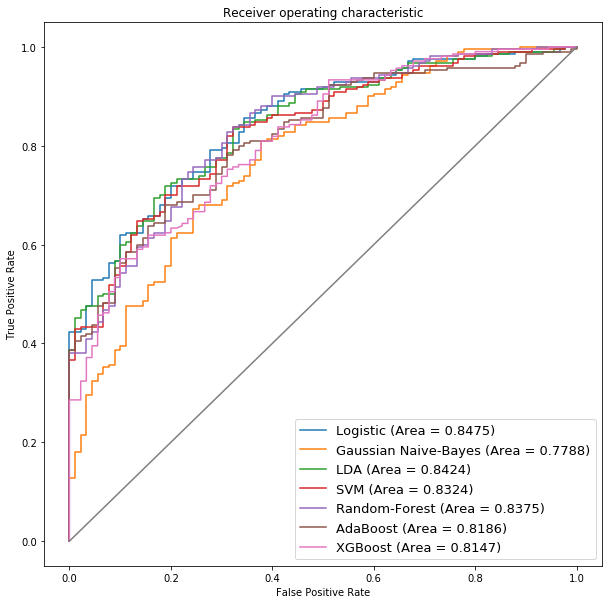

In [11]:
plt.figure(figsize=(10,10))
c = 0
for i,j in jpred.items():
    fpr, tpr, thresholds = roc_curve(np.array(y_test),j)
    ac = auc(fpr, tpr)
    print(names[c],": Area Under Curve = ", ac)
    slabel = names[c] + " (Area = %0.4f)" % ac
    plt.plot(fpr, tpr, label = slabel)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right", prop={'size': 13})
    c += 1
plt.plot([0,1],[0,1])

In [ ]:
for i in range(len(names)):
    class_names = ['Defaulters', 'Non Defaulters']
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm[i]), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix ' + names[i], y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# Feature Importance

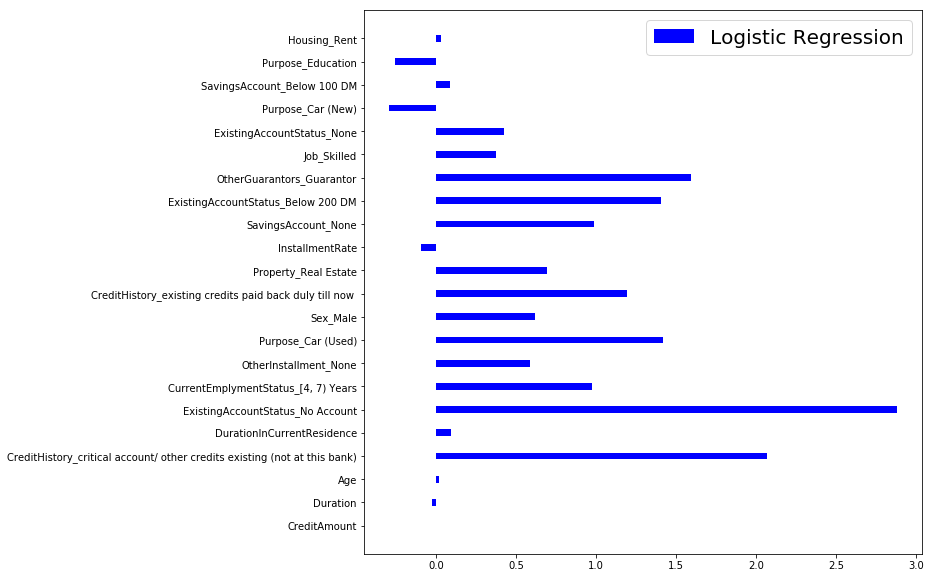

In [79]:
fi = pd.DataFrame()
fi['Names'] = e.columns
fi['Random-Forest'] = mod[4].feature_importances_
fi['XGBoost'] = mod[6].feature_importances_
fi['Logistic'] = mod[2].coef_[0]
fi.sort_values("XGBoost", inplace=True, ascending = False)
plt.figure(figsize=(10,10))
barWidth = 0.3
r1 = np.arange(len(fi['Names']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.barh(r1,fi['Logistic'], color = "blue", height=barWidth, label = "Logistic Regression")
plt.yticks([r for r in range(len(fi['Names']))], fi['Names'])
plt.legend(prop={'size': 20})
plt.show()

# DECISION BOUNDARY

In [66]:
f = e[["Duration", "InstallmentRate"]]
X = np.array(f)
lrg = BernoulliNB()
lr1 = lrg.fit(e,d)
h = 1
x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [67]:
c = a.copy(deep = True)
d = c["ClassificationStatus"]
c = c.drop(columns=['ClassificationStatus'])
c = c.drop(columns=['PersonalStatusAndSex'])
e = pd.get_dummies(c, drop_first=True)
e = e.rename(columns={'SavingsAccount_[100, 500) DM': 'SavingsAccount_(100, 500) DM', 'SavingsAccount_[500, 1000) DM': 'SavingsAccount_(500, 1000) DM', 'CurrentEmplymentStatus_[1, 4) Years' : 'CurrentEmplymentStatus_(1, 4) Years', "CurrentEmplymentStatus_[4, 7) Years": "CurrentEmplymentStatus_(4, 7) Years"})
h = []
g = e.describe()
for i in e.columns:
    h.append(e[i].median())
h = pd.DataFrame(h)
h['Names'] = e.columns
h[0][7] = 1
h[0][14] = 1
h[0][27] = 1
h[0][33] = 1
main = pd.DataFrame()
main["Duration"] = xx.ravel()
for i in range(len(e.columns)):
    main[str(e.columns[i])] = h[0][i]
main["Duration"] = xx.ravel()
main["InstallmentRate"] = yy.ravel()

Text(0.5, 1.0, 'Logistic Regression')

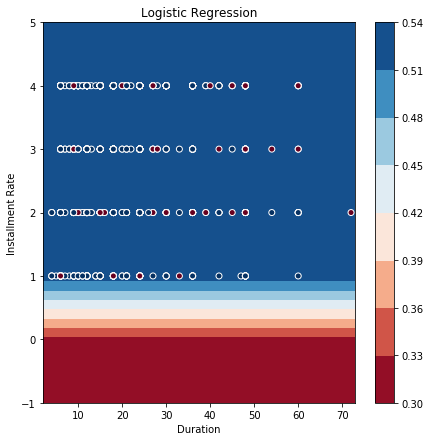

In [68]:
h = 1
x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.array(pd.DataFrame(lr1.predict_proba(np.array(main)))[1])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(7,7))
plt.contourf(xx, yy, Z, cmap="RdBu")
plt.colorbar()

plt.scatter(X[:, 0], X[:, 1], c=list(np.array(d)), cmap="RdBu", edgecolors='white')
plt.xlabel('Duration')
plt.ylabel('Installment Rate')
plt.title('Logistic Regression')